# 주제분석 1주차 패키지
### 위재성

## Chapter 1 크롤링
### 문제0. (기본 세팅) 크롬 드라이버를 설치하고, Beautiful Soup, Selenium 라이브러리를 다운받으세요.

In [46]:
import os
from selenium import webdriver

from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

driver = webdriver.Chrome()

In [47]:
url_base = 'https://www.mk.co.kr/news/stock?page='

date = []; head = []; text = []

for num in range(0,20):
    url = url_base + str(num)
    
    driver.get(url)
    driver.implicitly_wait(5)
    print('currently on: ', num,'page')
    
    source = driver.page_source
    soup = BeautifulSoup(source, 'html.parser')
    
    # 날짜
    for i in range(0,25):
        date.append(soup.select('span[class="date"]')[i].text)

    for j in range(1,26):
        # 제목 눌러서 기사 들어가기
        driver.find_element(By.XPATH, '//*[@id="container_left"]/div[3]/dl[{0}]/dt/a'.format(j)).click()
        
        # 제목
        head.append(driver.find_element(By.XPATH, '//*[@id="top_header"]/div/div/h1').text)
        
        # 본문
        text.append(driver.find_element(By.XPATH, '//*[@id="article_body"]/div').text)
        
        driver.back()  # 뒤로 가기

currently on:  0 page
currently on:  1 page
currently on:  2 page
currently on:  3 page
currently on:  4 page
currently on:  5 page
currently on:  6 page
currently on:  7 page
currently on:  8 page
currently on:  9 page
currently on:  10 page
currently on:  11 page
currently on:  12 page
currently on:  13 page
currently on:  14 page
currently on:  15 page
currently on:  16 page
currently on:  17 page
currently on:  18 page
currently on:  19 page


In [48]:
import pandas as pd
data = pd.DataFrame({'date': date, 'title': head, 'txt': text})
data.head(3)

,date,title,txt
0,2021.10.25 17:47,'균등배정' 카카오페이…뭉칫돈 청약 없었다,류영준 카카오페이 대표가 25일 온라인 기자간담회를 하고 있다. [사진 제공 = 카...
1,2021.10.25 17:46,삼성전자 저가매수 자금 '삼성그룹 ETF'에 몰린다,삼성전자 주가가 6만원대로 떨어진 이달 개인투자자는 삼성 계열사에 분산 투자하는 삼...
2,2021.10.25 17:47,포스코 질주…영업익 4.6배 폭증,포스코가 2개 분기 연속 최대 실적 기록을 갈아치우며 질주를 이어가고 있다. 자동차...


In [54]:
data.to_csv('news_data.csv', index=False, encoding = 'utf-8-sig')

## Chapter 2 워드클라우드
### 문제1. 앞에서 크롤링한 데이터의 ‘뉴스기사 제목’ 데이터를 활용하여 워드클라우드를 만들어보세요.

In [55]:
import pandas as pd
import numpy as np

data = pd.read_csv('news_data.csv')
data2 = data.title # 제목만 남겨둠

In [67]:
from konlpy.tag import Okt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt

okt = Okt()
noun = []

# list 해제
for title in data2:
    item = okt.nouns(title)
    noun += item

# 1글자인 단어 삭제
for i,v in enumerate(noun):
    if len(v) < 2 :
        noun.remove(v)
        
count = Counter(noun)
noun_list = count.most_common(100) # 빈도수 상위 100개만 도출

mask = np.array(Image.open('lion.png')) # 마스크 이미지 생성

wc = WordCloud(font_path='08SeoulNamsanEB.ttf',mask = mask, 
               background_color='white', random_state=42)


In [72]:
noun_list

[('아이', 222),
 ('로봇', 219),
 ('기자', 219),
 ('특징', 180),
 ('상승세', 176),
 ('테마', 172),
 ('종목', 49),
 ('코스닥', 39),
 ('상위', 39),
 ('코스피', 36),
 ('게임', 33),
 ('거래', 29),
 ('영업', 28),
 ('대비', 26),
 ('원자력발전', 24),
 ('기관', 23),
 ('작년', 23),
 ('외국인', 22),
 ('메타', 22),
 ('버스', 22),
 ('이익', 20),
 ('수도', 20),
 ('업종', 20),
 ('스마트폰', 19),
 ('직전', 19),
 ('다수', 19),
 ('투자', 18),
 ('종합', 17),
 ('콘텐츠', 17),
 ('모바일', 17),
 ('기업', 16),
 ('증시', 15),
 ('동기', 15),
 ('실적', 14),
 ('증권사', 14),
 ('매도', 14),
 ('상장', 13),
 ('관련', 13),
 ('금리', 13),
 ('상승', 13),
 ('제지', 13),
 ('자금', 12),
 ('증권', 12),
 ('최대', 12),
 ('지수선물', 12),
 ('옵션', 12),
 ('시세', 12),
 ('하락', 12),
 ('비트코인', 12),
 ('포스코', 11),
 ('공시', 11),
 ('거래소', 11),
 ('가상', 11),
 ('화폐', 11),
 ('마감', 10),
 ('강세', 10),
 ('카카오', 9),
 ('삼성', 9),
 ('유가', 9),
 ('오늘', 9),
 ('역대', 9),
 ('코로나', 9),
 ('대감', 9),
 ('국내', 9),
 ('주간', 9),
 ('뉴욕증시', 9),
 ('표', 9),
 ('레이더', 8),
 ('기술', 8),
 ('중국', 8),
 ('종료', 8),
 ('한국', 8),
 ('발표', 8),
 ('영상', 8),
 ('전자', 7),
 ('주식', 7),
 ('체

상위 10개의 명사는 '[아이넷 AI 로봇 기자] 특징주, ... 테마 상승세...', '코스닥 ... 상위종목'등의 반복적인 기사 제목에서 나온 것들이므로 삭제

(-0.5, 859.5, 730.5, -0.5)

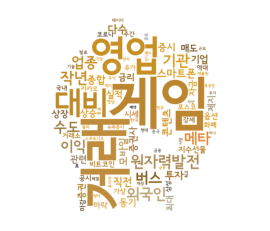

In [71]:
cloud = wc.generate_from_frequencies(dict(noun_list[10:]))

image_colors = ImageColorGenerator(mask) # 이미지로부터 색상 추출
plt.imshow(cloud.recolor(color_func=image_colors))
plt.axis('off')

### 문제2. 워드클라우드를 통해 파악할 수 있는 인사이트를 간단히 적어주세요.

최근 들어 게임 관련 테마주가 상승하는 추세이며 원자력 발전 테마주도 상승하는 추세인 것을 알 수 있습니다.